# Лабораторная работа №5

Вариант 8

## Цель работы
- изучение принципов построения информационных систем с использованием логических методов классификации.

## Задачи
- освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
- освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
- изучение параметров логической классификации;
- освоение модификаций логических методов классификации.

## Теоритечисеские сведения

Breast Cancer Wisconsin (Diagnostic) — это набор данных, который часто используется для задачи классификации рака молочной железы. Давай рассмотрим несколько теоретических сведений о наборе данных и задаче:

### Описание набора данных:
- Данные содержат измерения опухолей молочной железы, полученные с помощью изображений медицинских снимков.
- Каждая запись в наборе данных представляет собой измерения различных характеристик ячеек опухоли.
- Задача состоит в классификации опухоли как доброкачественной (B) или злокачественной (M).

### Оценка модели:
- Оценка модели включает в себя использование метрик, таких как точность, полнота, F1-мера и матрица ошибок.
- Эти метрики позволяют оценить производительность модели в предсказании доброкачественных и злокачественных опухолей.

Загрузим и подготовим данные

In [28]:
import pandas as pd

# Замени путь на актуальный
file_path = 'dataset/wdbc.data'

# Загрузка данных
column_names = ['id', 'diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
                 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
                 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
                 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30']

df = pd.read_csv(file_path, names=column_names)

# Посмотрим на первые несколько строк данных
df.head()


,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Разбиваем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
tree = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
tree.fit(X_train, y_train)

# Делаем предсказания
y_pred = tree.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")


Точность модели: 0.96


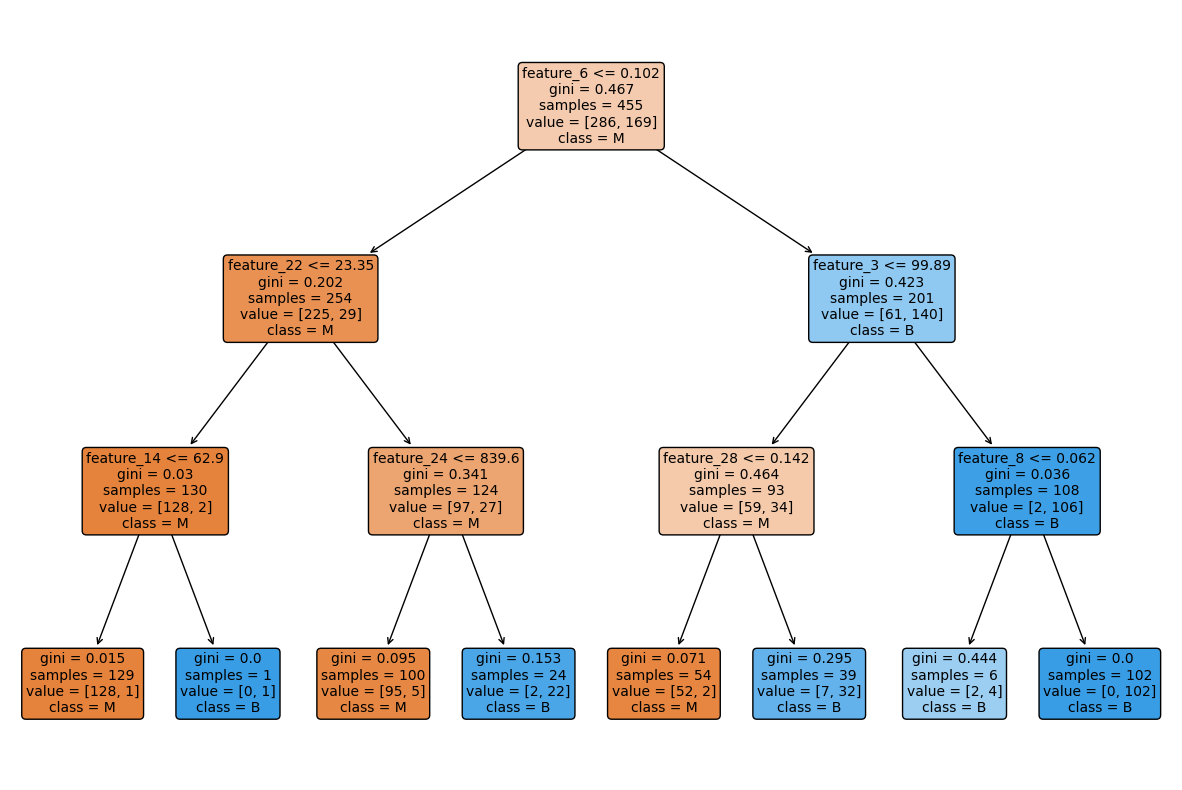

In [30]:
# Визуализация дерева решений

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, fontsize=10)
plt.show()

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Задай значения max_depth, которые ты хочешь проверить
max_depth_values = [3, 5, 7, 10, None]

# Список для сохранения оценок кросс-валидации
cv_scores_depth = []

# Проходим по значениям max_depth
for depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=21, max_features=2)
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')  # используем accuracy в качестве метрики
    cv_scores_depth.append(scores.mean())

# Теперь у нас есть список с оценками для каждого значения max_depth

In [32]:
# Задай значения max_features, которые ты хочешь проверить
max_features_values = [2, 4, 6, 8, 'sqrt', 'log2', None]

# Список для сохранения оценок кросс-валидации
cv_scores_features = []

# Проходим по значениям max_features
for features in max_features_values:
    tree = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=features)
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')  # используем accuracy в качестве метрики
    cv_scores_features.append(scores.mean())

# Теперь у нас есть список с оценками для каждого значения max_features

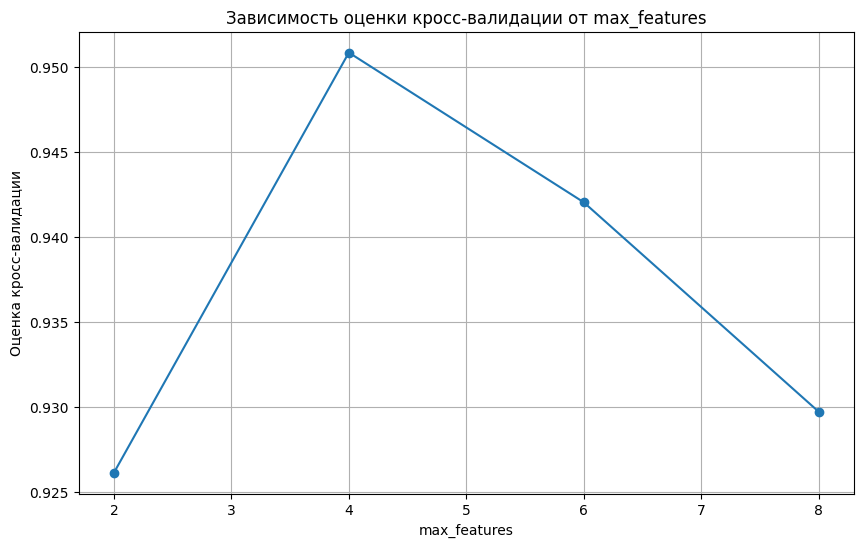

In [33]:
import matplotlib.pyplot as plt

# Убираем строковые значения из max_features_values
max_features_values = [val for val in max_features_values if isinstance(val, (int, float))]

# Убираем соответствующие значения из cv_scores_features
cv_scores_features = cv_scores_features[:len(max_features_values)]

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, cv_scores_features, marker='o')
plt.title('Зависимость оценки кросс-валидации от max_features')
plt.xlabel('max_features')
plt.ylabel('Оценка кросс-валидации')
plt.grid(True)
plt.show()


In [34]:
# Находим индекс максимального значения оценки кросс-валидации для max_depth
optimal_depth_index = np.argmax(cv_scores_depth)
optimal_depth = max_depth_values[optimal_depth_index]
print(f'Оптимальная глубина дерева (max_depth): {optimal_depth}')

# Находим индекс максимального значения оценки кросс-валидации для max_features
optimal_features_index = np.argmax(cv_scores_features)
optimal_features = max_features_values[optimal_features_index]
print(f'Оптимальное количество признаков (max_features): {optimal_features}')


Оптимальная глубина дерева (max_depth): 3
Оптимальное количество признаков (max_features): 4


In [35]:
# Создаем окончательную модель с оптимальными параметрами
final_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=21, max_features=optimal_features)

# Обучаем модель на всем тренировочном наборе данных
final_tree.fit(X, y)

# Делаем предсказания на тестовом наборе данных
y_final_pred = final_tree.predict(X_test)

# Оцениваем точность окончательной модели
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Точность окончательной модели: {final_accuracy:.2f}")

Точность окончательной модели: 0.95


In [23]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.4 MB 326.8 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 363.1 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 326.8 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 467.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 467.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 448.2 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 448.2 kB/s eta 0:00:03
   ---- ------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


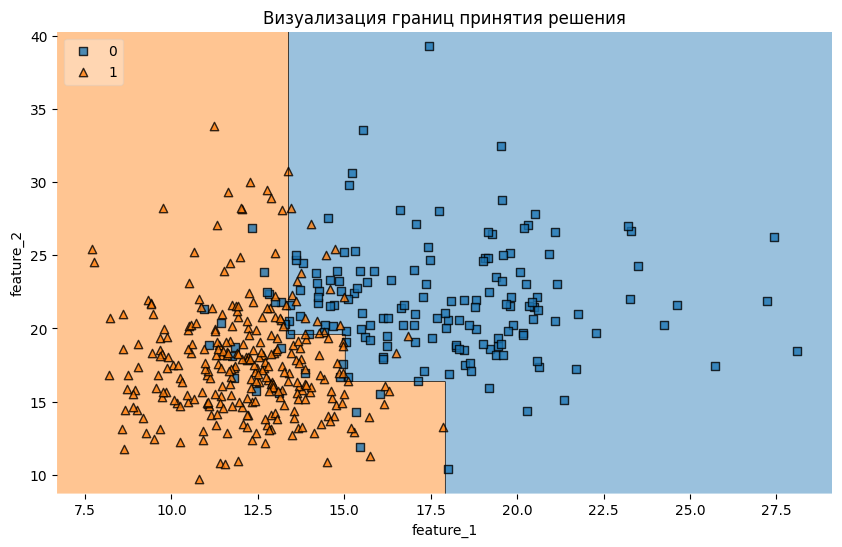

In [36]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Создаем матрицу признаков для обучения (возьмем первые два признака для простоты)
X_train_subset = X_train.iloc[:, :2].values

# Преобразуем целевую переменную в числовой формат (M -> 0, B -> 1)
y_train_numeric = y_train.map({'M': 0, 'B': 1})

# Создаем и обучаем модель (можно использовать вашу обученную модель)
tree = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=4)
tree.fit(X_train_subset, y_train_numeric)

# Визуализируем решающие границы
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_subset, y_train_numeric.values, clf=tree, legend=2)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.title('Визуализация границ принятия решения')
plt.show()

In [27]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 435.7 kB/s eta 0:00:36
   ---------------------------------------- 0.0/15.6 MB 435.7 kB/s eta 0:00:36
   ---------------------------------------- 0.1/15.6 MB 438.9 kB/s eta 0:00:36
   ---------------------------------------- 0.1/15.6 MB 438.1 kB/s eta 0:00:36
   ---------------------------------------- 0.1/15.6 MB 568.9 kB/s eta 0:00:28
   ---------------------------------------- 0.2/15.6 MB


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# Посмотрим на признаки, которые использовались при обучении модели
feature_names = X.columns
feature_names

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30'],
      dtype='object')

In [40]:
tree_3d = DecisionTreeClassifier(random_state=42)
tree_3d.fit(X_train[['feature_1', 'feature_2', 'feature_3']], y_train)

DecisionTreeClassifier(random_state=42)

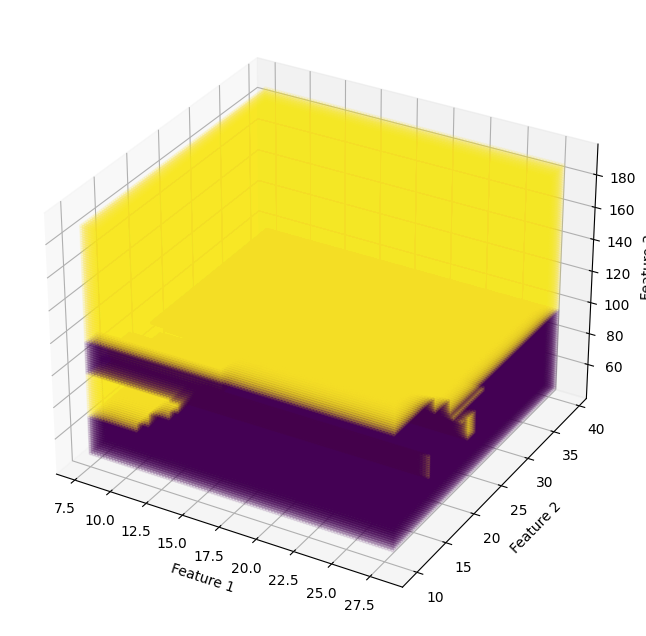

In [49]:
# Визуализация решающей границы
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot для точек данных
class_to_color = {'B': 0, 'M': 1}
colors = np.array([class_to_color[c] for c in predictions_3d])
ax.scatter(xx, yy, zz, c=colors, marker='.', alpha=0.1)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

## Контрольные вопросы

### Поясните принцип построения дерева решений.
- Дерево решений строится с использованием принципа жадной максимизации прироста информации. В начале процесса все данные находятся в корне дерева, а затем при каждом разделении выбирается признак и порог, которые максимизируют прирост информации. Данный процесс повторяется рекурсивно для каждого поддерева, пока не выполнится критерий остановки (например, достигнута максимальная глубина дерева или число объектов в узле меньше определенного порога).

### Укажите статистическое определение информативности.
- Статистическое определение информативности основывается на измерении "чистоты" узла, которая может быть определена разными способами в зависимости от задачи. Например, для задач классификации это может быть доля объектов основного класса в узле.

### Поясните энтропийное определение информативности.
- Энтропийное определение информативности использует меру энтропии, которая измеряет степень хаоса или неопределенности в системе. Чем выше энтропия, тем менее информативен узел. Формула энтропии для узла: ![Формула](./img/formula.png), где с - количество классов, pi - доля объектов в i узле

### Что такое многоклассовая информативность? Для чего она применяется?
- Многоклассовая информативность применяется в задачах, где число классов больше двух. Она может быть определена, например, с использованием критерия Джини или энтропии. Применение многоклассовой информативности позволяет строить деревья решений для задач с более чем двумя классами.

### Поясните назначение и алгоритм бинаризации количественных признаков.
- Бинаризация количественных признаков нужна для того, чтобы преобразовать их в категориальные. Алгоритм заключается в выборе порога, который наилучшим образом разделяет данные на две категории.

### Поясните порядок поиска закономерностей в форме конъюнкций.
- Порядок поиска закономерностей в форме конъюнкций заключается в том, чтобы последовательно добавлять предикаты (условия) к правилам, проверяя, как они улучшают качество модели.